# Вариант 3

Построить модель линейной регрессии на имеющихся данных

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df_x = pd.read_csv('x.csv')
df_y = pd.read_csv('y.csv')

df_x.head()

,Unnamed: 0,0
0,0,1.462108
1,1,1.133769
2,2,-2.301539
3,3,1.744812
4,4,0.042214


In [5]:
df_y.head()

,Unnamed: 0,0
0,0,101.159902
1,1,78.442913
2,2,-159.238195
3,3,120.719533
4,4,2.920673


In [7]:
df_x = df_x.rename({'Unnamed: 0': "first"}, axis=1)
df_y = df_y.rename({'Unnamed: 0': "first"}, axis=1)

res = pd.merge(df_x, df_y, on = 'first' ) # , on=0)

In [11]:
df_res = res.iloc[:, [1,2]]
df_res

,0_x,0_y
0,1.462108,101.159902
1,1.133769,78.442913
2,-2.301539,-159.238195
3,1.744812,120.719533
4,0.042214,2.920673
5,-0.611756,-42.326026
6,0.319039,22.073585
7,-0.761207,-52.666163
8,0.582815,40.323651
9,-1.099891,-76.098960


Зашумим входные данные

In [30]:
noise = np.random.randint(-100, 340, size=20) / 10
df_res['0_y'] = df_res['0_y'] + noise
df_res.describe()

C:\Users\190912\AppData\Local\Temp/ipykernel_7564/3698376861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res['0_y'] = df_res['0_y'] + noise


,0_x,0_y
count,20.000000,20.000000
mean,-0.133365,15.782806
std,1.128377,85.311454
min,-2.301539,-138.938195
25%,-0.790370,-37.839735
50%,-0.285894,-2.200877
75%,0.653463,71.011631
max,1.744812,180.919533


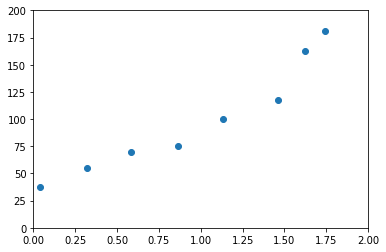

In [31]:
plt.figure()
plt.scatter(df_res['0_x'], df_res['0_y'])
plt.ylim(0, 200)
plt.xlim(0, 2)
plt.show()

In [32]:
model = LinearRegression()  # Создаём модель

In [33]:
X = pd.DataFrame(df_res['0_x'])
Y = pd.DataFrame(df_res['0_y'])

In [34]:
model.fit(X, Y)  # Скармливаем данные

LinearRegression()

In [35]:
model.coef_   # Коэф

array([[73.96815489]])

In [36]:
model.intercept_  # Точка пересечения

array([25.64754211])

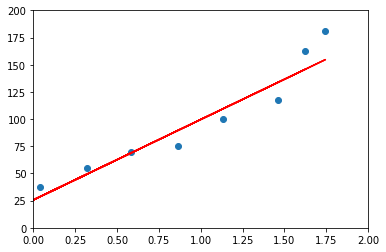

In [39]:
plt.figure()
plt.scatter(df_res['0_x'], df_res['0_y'])
plt.ylim(0, 200)
plt.xlim(0, 2)
plt.plot(X, model.predict(X), color = 'red')

In [38]:
model.score(X, Y)  # Коэфф детермин

0.9571566526215098

In [42]:
mean_squared_error(Y, model.predict(Y))  # Среднеквадратическая ошибка

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 0_y
Feature names seen at fit time, yet now missing:
- 0_x

  warnings.warn(message, FutureWarning)


38199334.1656536

# Отчетность

В первую очередь в работе должна быть продемонстрирована ваша архитектура и процесс обучения (с кратким обоснованием выбора гиперпараметров).


Далее:

(В конце вашего ноутбука укажите следующие данные)

По задачам классификации:

1.  Вывести метрики классификации на тестовом множестве: accuracy, precision, recall и f1-score(для бинарной) и метрик качества для каждого класса, в случае использования датасета с лицами.
2.  Обосновать выбранное соотношение train/test на основе построения кривых обучения (или понятного вывода результатов эксперимента) 



По задаче регрессии:



1.   Вывести коэффициент детерминации и средний квадрат ошибки
2.   Продемнострировать, что выбрано оптимальное соотношение train/test, путем перебора всех содержательных вариантов.

